In [1]:
!pip install wordcloud

In [2]:
import requests

def wikipedia_page(title):
  '''
  This function returns the raw text of a wikipedia page
  given a wikipedia page title
  '''

  params = {
   'action': 'query',
   'format': 'json', # request json formatted content
   'titles': title, # title of the wikipedia page
    'prop': 'extracts',
    'explaintext': True
   }

   # send a request to the wikipedia api
  response = requests.get('https://en.wikipedia.org/w/api.php', params= params).json()
  print("reponse: ", response)

  # Parse the result
  page = next(iter(response['query']['pages'].values()))
  print("page: ", page)
  print("page.keys(): ", page.keys())
  print("page['extract']: ", page['extract'])



  # return the page content
  if 'extract' in page.keys():
      return page['extract']
  else:
      return "Page not found"
# first get the text from the wikipedia page with

In [3]:
text = wikipedia_page('Coffee').lower()

reponse:  {'batchcomplete': '', 'query': {'pages': {'604727': {'pageid': 604727, 'ns': 0, 'title': 'Coffee', 'extract': 'Coffee is a beverage prepared from roasted coffee beans. Darkly colored, bitter, and slightly acidic, coffee has a stimulating effect on humans, primarily due to its caffeine content. It has the highest sales in the world market for hot drinks.The seeds of the Coffea plant\'s fruits are separated to produce unroasted green coffee beans. The beans are roasted and then ground into fine particles that are typically steeped in hot water before being filtered out, producing a cup of coffee. It is usually served hot, although chilled or iced coffee is common. Coffee can be prepared and presented in a variety of ways (e.g., espresso, French press, caffè latte, or already-brewed canned coffee). Sugar, sugar substitutes, milk, and cream are often added to mask the bitter taste or enhance the flavor.\nThough coffee is now a global commodity, it has a long history tied closely 

In [4]:
print(text)

coffee is a beverage prepared from roasted coffee beans. darkly colored, bitter, and slightly acidic, coffee has a stimulating effect on humans, primarily due to its caffeine content. it has the highest sales in the world market for hot drinks.the seeds of the coffea plant's fruits are separated to produce unroasted green coffee beans. the beans are roasted and then ground into fine particles that are typically steeped in hot water before being filtered out, producing a cup of coffee. it is usually served hot, although chilled or iced coffee is common. coffee can be prepared and presented in a variety of ways (e.g., espresso, french press, caffè latte, or already-brewed canned coffee). sugar, sugar substitutes, milk, and cream are often added to mask the bitter taste or enhance the flavor.
though coffee is now a global commodity, it has a long history tied closely to food traditions around the red sea. the earliest credible evidence of coffee-drinking as the modern beverage appears in 

In [5]:
from wordcloud import WordCloud


# Instantiate / create a new wordcloud.
wordcloud = WordCloud(
    random_state = 8,
    normalize_plurals = False,
    width = 600,
    height= 300,
    max_words = 300,
    stopwords = []
)

# Apply the wordcloud to the text.
wordcloud.generate(text)

(-0.5, 599.5, 299.5, -0.5)

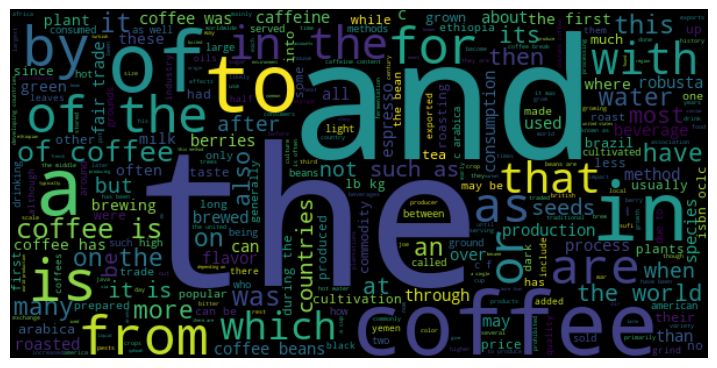

In [6]:
# Import matplotlib
import matplotlib.pyplot as plt

# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))

# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')

# and remove the axis
plt.axis("off")

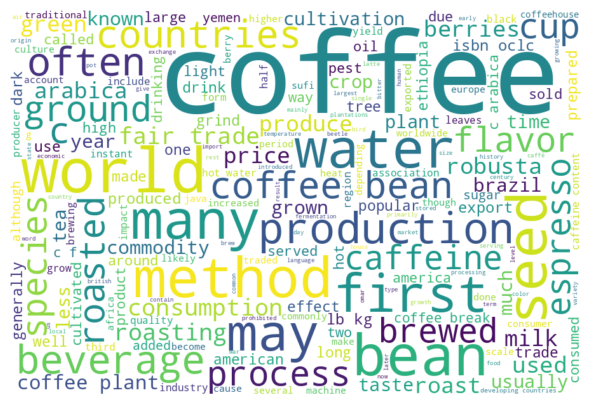

In [ ]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Kelebek şeklindeki maske resmini yükleyin
mask = np.array(Image.open("/content/butterfly.png"))

# WordCloud özelleştirmeleri
wordcloud = WordCloud(
    background_color="white", # Arka plan rengi
    max_words=200,            # Maksimum kelime sayısı
    mask=mask,                # Kelebek maskesini kullan
    contour_width=1,          # Ana hat genişliği
    contour_color="blue",     # Ana hat rengi
    colormap="viridis"        # Renk paleti
).generate(text)

# Görselleştirme
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


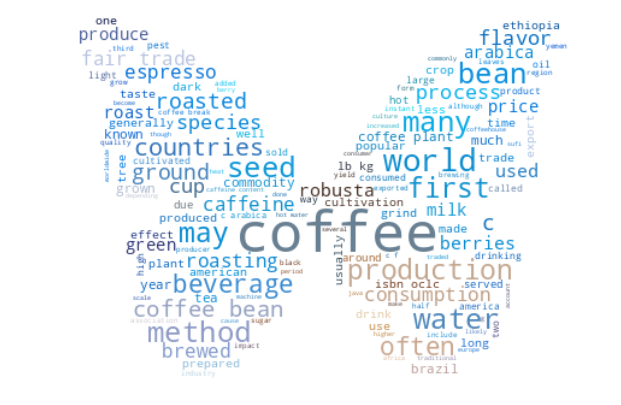

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


mask = np.array(Image.open("/content/butterfly-2.png"))

wordcloud = WordCloud(
    background_color="white",
    mask=mask,
).generate(text)

# Maskeye göre renkleri uygula
image_colors = ImageColorGenerator(mask)
wordcloud.recolor(color_func=image_colors)

# Görselleştirme
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
